# **Visualização dos dados do SINAN (2007-2023) - Gerais**

# **Inicializando os dados**

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [354]:
!pip install -q gdown
import gdown

In [355]:
url = 'https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ'
output = 'dados.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ
To: /content/dados.csv
100%|██████████| 73.6M/73.6M [00:00<00:00, 117MB/s]


'dados.csv'

In [356]:
df = pd.read_csv('dados.csv', sep=',', encoding='latin1')
df.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
0,2007-01-25,200704,2007,35,350280,1958.0,4048,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2007-01-29,200705,2007,35,354850,1960.0,4046,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN
2,2007-01-22,200704,2007,35,351660,NaN,4018,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2007-01-25,200704,2007,35,351660,1967.0,4039,F,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,2007-01-03,200701,2007,35,351660,1988.0,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [357]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN', 'ANI_ARANHA',
       'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS', 'NU_AMPOL_1',
       'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7', 'NU_AMPO_5',
       'NU_AMPOL_9', 'NU_AMPOL_3', 'DOENCA_TRA', 'EVOLUCAO'],
      dtype='object')

# **Gerando visualizações gerais**

## Número de casos ao longo do tempo

### Número de acidentes por ano

In [358]:
ano_abs = pd.crosstab(index=df['NU_ANO'], columns='Frequência').reset_index()
ano_abs

col_0,NU_ANO,Frequência
0,2007,10618
1,2008,12576
2,2009,15308
3,2010,15348
4,2011,16375
5,2012,19273
6,2013,22231
7,2014,22174
8,2015,25953
9,2016,28517


In [359]:
# Criar o gráfico
fig = px.line(
    ano_abs,
    x='NU_ANO',
    y='Frequência',
    markers=True,
    labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Acidentes'},
    title='Número de Acidentes por Ano',
    color_discrete_sequence=px.colors.qualitative.Safe,
    text=ano_abs['Frequência']
)

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs['Frequência'], textposition="top center")

# Adicionar legenda da fonte como anotação
fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis_title="Número de Acidentes",
    xaxis_title="Ano",
    annotations=[
        dict(
            text='Fonte: SINAN – DATASUS',
            xref='paper', yref='paper',
            x=0, y=-0.2,  # posição abaixo do gráfico
            showarrow=False,
            font=dict(size=12, color='gray'),
            align='left'
        )
    ]
)

# Exibir o gráfico
fig.show()


In [360]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')
df_obitos = df[df['EVOLUCAO'] == 2]

ano_abs_obitos = pd.crosstab(index=df_obitos['NU_ANO'], columns='Frequência').reset_index()
ano_abs_obitos

col_0,NU_ANO,Frequência
0,2007,9
1,2008,10
2,2009,11
3,2010,7
4,2011,16
5,2012,14
6,2013,12
7,2014,10
8,2015,18
9,2016,20


In [361]:
fig = px.line(ano_abs_obitos, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Óbitos'},
              title='Número de Óbitos por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs_obitos['Frequência']
    )

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs_obitos['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis_title="Número de Óbitos",
    xaxis_title="Ano",
    annotations=[
        dict(
            text='Fonte: SINAN – DATASUS',
            xref='paper', yref='paper',
            x=0, y=-0.2,  # posição abaixo do gráfico
            showarrow=False,
            font=dict(size=12, color='gray'),
            align='left'
        )
    ]
)

# Exibir o gráfico
fig.show()

In [362]:
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']
ano_abs_obitos['Label'] = ano_abs_obitos['Percentual'].map(lambda x: f'{x :.3f}%')

ano_abs_obitos

col_0,NU_ANO,Frequência,Percentual,Label
0,2007,9,0.084762,0.085%
1,2008,10,0.079517,0.080%
2,2009,11,0.071858,0.072%
3,2010,7,0.045609,0.046%
4,2011,16,0.097710,0.098%
5,2012,14,0.072640,0.073%
6,2013,12,0.053979,0.054%
7,2014,10,0.045098,0.045%
8,2015,18,0.069356,0.069%
9,2016,20,0.070134,0.070%


In [363]:
# Calcular proporção de óbitos em relação aos acidentes
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência'] * 100 / ano_abs['Frequência']

# Criar a figura
fig = go.Figure()

# Acidentes em barras
fig.add_trace(go.Bar(
    x=ano_abs['NU_ANO'],
    y=ano_abs['Frequência'],
    name='Acidentes',
    marker_color=px.colors.qualitative.Safe[0],
    text=ano_abs['Frequência'],
    textposition='outside',
    yaxis='y'
))

# Óbitos em proporção (linha)
fig.add_trace(go.Scatter(
    x=ano_abs_obitos['NU_ANO'],
    y=ano_abs_obitos['Percentual'],
    name='Óbitos',
    mode='lines+markers+text',
    text=ano_abs_obitos['Label'],
    textposition='top center',
    line=dict(color=px.colors.qualitative.Safe[1], width=3),
    marker=dict(size=8),
    yaxis='y2'
))

# Atualizar layout com legenda da fonte
fig.update_layout(
    title='Acidentes com Animais Peçonhentos e Percentual de Óbitos em SP (2007–2023)',
    xaxis=dict(title='Ano', dtick=1, showgrid=True),
    yaxis=dict(title='Número de Acidentes', showgrid=True),
    yaxis2=dict(
        title='Óbitos Relativo ao Acidentes (%)',
        overlaying='y',
        side='right',
        showgrid=True,
        range=[0, 1]
    ),
    legend=dict(
        title='Indicador',
        orientation='v',
        x=0.01,    # Bem à esquerda
        y=0.99,    # Topo
        xanchor='left',
        yanchor='top'
    ),
    barmode='group',
    template='plotly_white',
    annotations=[
        dict(
            text='Fonte: SINAN – DATASUS',
            xref='paper', yref='paper',
            x=0, y=-0.2,
            showarrow=False,
            font=dict(size=12, color='gray'),
            align='left'
        )
    ],
    margin=dict(b=100)  # Aumenta a margem inferior para não cortar a legenda
)

# Exibir gráfico
fig.show()


### Número de acidentes por semana epidemiológica


In [364]:
# Removendo espaços em branco, preenchendo valores vazios com '00' e mantendo os dois últimos dígitos
df['SEM_NOT'] = (
    df['SEM_NOT']
    .astype(str)
    .str.strip()               # Remove espaços em branco
    .replace('', '00')          # Substitui valores vazios por '00'
    .str[-2:]                   # Mantém apenas os dois últimos dígitos
    .astype(int)                # Converte de volta para inteiro
)

display(df)

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
0,2007-01-25,4,2007,35,350280,1958.0,4048,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2007-01-29,5,2007,35,354850,1960.0,4046,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,<NA>
2,2007-01-22,4,2007,35,351660,NaN,4018,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,2007-01-25,4,2007,35,351660,1967.0,4039,F,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
4,2007-01-03,1,2007,35,351660,1988.0,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538111,2023-12-31,1,2023,35,351600,1956.0,4067,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538112,2023-12-31,1,2023,35,351920,1973.0,4050,M,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538113,2023-12-31,1,2023,35,350810,2006.0,4017,F,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538114,2023-12-31,1,2023,35,350930,2012.0,4011,M,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1


In [365]:
# Agrupando por ano e semana
filtered_data = df.groupby(["NU_ANO", "SEM_NOT"]).size().reset_index(name="Casos")

# Criar gráfico de barras
fig = px.bar(
    filtered_data,
    x="SEM_NOT",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Semana de Notificação",
    labels={
        "SEM_NOT": "Semana de Notificação",
        "Casos": "Número de Casos",
        "NU_ANO": "Ano"
    },
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionando a legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)

# Exibir gráfico
fig.show()


### Número de acidentes por mês

In [366]:
# Extraindo o mês de 'DT_NOT' nas posições 5 e 6
df['MES'] = df['DT_NOTIFIC'].astype(str).str[5:7]

# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "MES"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e mês
fig = px.bar(
    filtered_data,
    x="MES",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Mês de Notificação",
    labels={"MES": "Mês", "Casos": "Número de Casos", "NU_ANO": "Ano"},
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionando a legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)

fig.show()


## Informações dos acidentes


### Tipo de animal por acidente

In [367]:
tab_ani = pd.crosstab(index=df['TP_ACIDENT'], columns='Frequência').reset_index()
tab_ani

col_0,TP_ACIDENT,Frequência
0,1.0,33067
1,2.0,75071
2,3.0,341567
3,4.0,11310
4,5.0,48054
5,6.0,14951
6,9.0,14096


In [368]:
animal_legend = {
    1: "Serpente",
    2: "Aranha",
    3: "Escorpião",
    4: "Lagarta",
    5: "Abelha",
    6: "Outros",
    9: "Ignorado"
}

tab_ani['Animal'] = tab_ani['TP_ACIDENT'].map(animal_legend)
tab_ani

col_0,TP_ACIDENT,Frequência,Animal
0,1.0,33067,Serpente
1,2.0,75071,Aranha
2,3.0,341567,Escorpião
3,4.0,11310,Lagarta
4,5.0,48054,Abelha
5,6.0,14951,Outros
6,9.0,14096,Ignorado


In [369]:
# Gráfico de pizza
fig = px.pie(
    tab_ani,
    names='Animal',
    values='Frequência',
    title="Número de Acidentes por Animal",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionando a legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)
fig.show()

In [370]:
df_obt_ani = df.copy()
df_obt_ani = df_obt_ani[df_obt_ani['EVOLUCAO'] == 2]

ani_let = pd.crosstab(index=df_obt_ani['TP_ACIDENT'], columns='Óbitos').reset_index()
ani_let['Animal'] = ani_let['TP_ACIDENT'].map(animal_legend)
ani_let

col_0,TP_ACIDENT,Óbitos,Animal
0,1.0,100,Serpente
1,2.0,15,Aranha
2,3.0,109,Escorpião
3,4.0,2,Lagarta
4,5.0,91,Abelha
5,9.0,5,Ignorado


In [371]:
ani_let['Percentual'] = ani_let['Óbitos'] * 100 / tab_ani['Frequência']
ani_let['Label'] = ani_let['Percentual'].apply(lambda x: f'{x:.3f}%')
ani_let

col_0,TP_ACIDENT,Óbitos,Animal,Percentual,Label
0,1.0,100,Serpente,0.302416,0.302%
1,2.0,15,Aranha,0.019981,0.020%
2,3.0,109,Escorpião,0.031912,0.032%
3,4.0,2,Lagarta,0.017683,0.018%
4,5.0,91,Abelha,0.189370,0.189%
5,9.0,5,Ignorado,0.033443,0.033%


In [372]:
fig = px.bar(
    ani_let,
    x='Animal',
    y='Percentual',
    title='Taxa de letalidade por animal',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionando a legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.15,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)

fig.show()


### Aplicação de soro

In [373]:
soro = pd.crosstab(index=df['CON_SOROTE'], columns='Frequência').reset_index()
soro

col_0,CON_SOROTE,Frequência
0,1.0,43787
1,2.0,457579
2,9.0,36750


In [374]:
soro_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

soro['Soro'] = soro['CON_SOROTE'].map(soro_legend)

# Gráfico de pizza
fig = px.pie(
    soro,
    names='Soro',
    values='Frequência',
    title='Aplicação de soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

# Adicionando a legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.15,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)

fig.show()


In [375]:
df['Soro'] = df['CON_SOROTE'].map(soro_legend)
df['Animal'] = df['TP_ACIDENT'].map(animal_legend)
pd.crosstab(index=df['Soro'], columns=df['Animal'])

Animal,Abelha,Aranha,Escorpião,Ignorado,Lagarta,Outros,Serpente
Soro,,,,,,,
Ignorado,3827,7177,18754,2253,1230,1571,1938
Não,43956,62378,308934,11532,9922,13149,7708
Sim,271,5516,13879,311,158,231,23421


In [376]:
pd.crosstab(index=df['Soro'], columns=df['Animal'], normalize='index').round(3)

Animal,Abelha,Aranha,Escorpião,Ignorado,Lagarta,Outros,Serpente
Soro,,,,,,,
Ignorado,0.104,0.195,0.510,0.061,0.033,0.043,0.053
Não,0.096,0.136,0.675,0.025,0.022,0.029,0.017
Sim,0.006,0.126,0.317,0.007,0.004,0.005,0.535


In [377]:
pd.crosstab(index=df['Soro'], columns=df['Animal'], normalize='columns').round(3)

Animal,Abelha,Aranha,Escorpião,Ignorado,Lagarta,Outros,Serpente
Soro,,,,,,,
Ignorado,0.080,0.096,0.055,0.160,0.109,0.105,0.059
Não,0.915,0.831,0.904,0.818,0.877,0.879,0.233
Sim,0.006,0.073,0.041,0.022,0.014,0.015,0.708


In [378]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
soro_obt = pd.crosstab(index=df_obt['CON_SOROTE'], columns='Frequência').reset_index()
soro_obt

col_0,CON_SOROTE,Frequência
0,1.0,188
1,2.0,121
2,9.0,13


In [379]:
soro_obt['Percentual'] = (soro_obt['Frequência'] / soro['Frequência']) * 100
soro_obt['Label'] = soro_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
soro_obt['Soro'] = soro_obt['CON_SOROTE'].map(soro_legend)
soro_obt

col_0,CON_SOROTE,Frequência,Percentual,Label,Soro
0,1.0,188,0.429351,0.429%,Sim
1,2.0,121,0.026444,0.026%,Não
2,9.0,13,0.035374,0.035%,Ignorado


In [380]:
# Gráfico de pizza
fig = px.pie(
    soro_obt,
    names='Soro',
    values='Frequência',
    title='Percentual de mortes e soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

# Adicionando a legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.15,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)

fig.show()

### Tempo de atendimento

In [381]:
tempo = pd.crosstab(index=df['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo

col_0,ANT_TEMPO_,Frequência
0,1.0,343315
1,2.0,82689
2,3.0,24000
3,4.0,10452
4,5.0,12948
5,6.0,23070
6,9.0,32526


In [382]:
tempo_dict = {
    1: '0 - 1h',
    2: '1 - 3h',
    3: '3 - 6h',
    4: '6 - 12h',
    5: '12 - 24h',
    6: '24h ou mais',
    9: 'Ignorado'
}

tempo['Tempo'] = tempo['ANT_TEMPO_'].map(tempo_dict)
tempo

col_0,ANT_TEMPO_,Frequência,Tempo
0,1.0,343315,0 - 1h
1,2.0,82689,1 - 3h
2,3.0,24000,3 - 6h
3,4.0,10452,6 - 12h
4,5.0,12948,12 - 24h
5,6.0,23070,24h ou mais
6,9.0,32526,Ignorado


In [383]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Frequência',
    title='Número de casos por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.15,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)


fig.show()

In [384]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
tempo_obt = pd.crosstab(index=df_obt['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo['Óbitos'] = tempo_obt['Frequência']
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos
0,1.0,343315,0 - 1h,153
1,2.0,82689,1 - 3h,59
2,3.0,24000,3 - 6h,33
3,4.0,10452,6 - 12h,11
4,5.0,12948,12 - 24h,13
5,6.0,23070,24h ou mais,27
6,9.0,32526,Ignorado,21


In [385]:
tempo['Percentual'] = tempo['Óbitos'] * 100 / tempo['Frequência']
tempo['Label'] = tempo['Percentual'].apply(lambda x: f'{x:.3f}%')
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos,Percentual,Label
0,1.0,343315,0 - 1h,153,0.044565,0.045%
1,2.0,82689,1 - 3h,59,0.071352,0.071%
2,3.0,24000,3 - 6h,33,0.137500,0.138%
3,4.0,10452,6 - 12h,11,0.105243,0.105%
4,5.0,12948,12 - 24h,13,0.100402,0.100%
5,6.0,23070,24h ou mais,27,0.117035,0.117%
6,9.0,32526,Ignorado,21,0.064564,0.065%


In [386]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Óbitos',
    title='Número de mortes por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.15,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)


fig.show()

In [387]:
fig = px.bar(
    tempo,
    x='Tempo',
    y='Percentual',
    title='Taxa de letalidade por tempo de espera',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.15,  # pode ajustar se estiver muito longe ou perto
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ]
)


fig.show()

### Aplicação de soro e Tempo de espera

In [388]:
# Filtrar valores onde ANT_TEMPO_ ≠ 9
#df_filtrado = df[df['ANT_TEMPO_'] != 9]
#df_filtrado = df_filtrado[df_filtrado['CON_SOROTE'] != 9]

# Gerar a crosstab com os valores válidos
#soro_tempo = pd.crosstab(df_filtrado['ANT_TEMPO_'], df_filtrado['CON_SOROTE'])
soro_tempo = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'])
soro_tempo

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,23246,300810,19259
2.0,10748,66948,4993
3.0,3366,19106,1528
4.0,1116,8572,764
5.0,1036,10815,1097
6.0,1519,19509,2042
9.0,1776,26140,4610


In [389]:
# Renomear o índice (linhas) com tempo_dict
soro_tempo.index = soro_tempo.index.map(tempo_dict)

# Renomear as colunas com soro_dict
soro_tempo.columns = [soro_legend.get(col, col) for col in soro_tempo.columns]
soro_tempo

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,23246,300810,19259
1 - 3h,10748,66948,4993
3 - 6h,3366,19106,1528
6 - 12h,1116,8572,764
12 - 24h,1036,10815,1097
24h ou mais,1519,19509,2042
Ignorado,1776,26140,4610


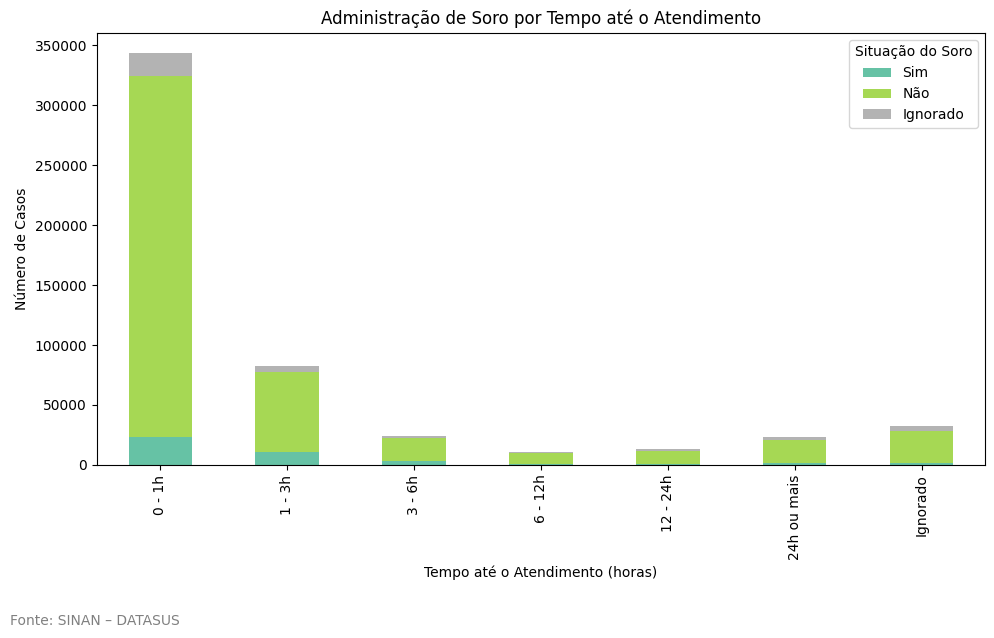

In [390]:
# Criar o gráfico
ax = soro_tempo.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2',
    title='Administração de Soro por Tempo até o Atendimento'
)

# Eixos
ax.set_xlabel('Tempo até o Atendimento (horas)')
ax.set_ylabel('Número de Casos')

# Legenda
plt.legend(title='Situação do Soro', loc='upper right')

# Fonte abaixo do gráfico
plt.figtext(0.01, -0.05, 'Fonte: SINAN – DATASUS', ha='left', fontsize=10, color='gray')

# Ajustar layout
plt.tight_layout()

# Exibir
plt.show()


In [391]:
percentual = soro_tempo.div(soro_tempo.sum(axis=1), axis=0) * 100

percentual_plot = percentual.reset_index().melt(id_vars='ANT_TEMPO_', var_name='Recebeu Soro', value_name='Percentual')

fig = px.bar(
    percentual_plot,
    x='ANT_TEMPO_',
    y='Percentual',
    color='Recebeu Soro',
    title='Percentual de Administração de Soro por Tempo até o Atendimento',
    text=percentual_plot['Percentual'].round(1).astype(str) + '%',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Posicionar o texto dentro das barras
fig.update_traces(textposition='inside')

# Adicionar legenda da fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text='Fonte: SINAN – DATASUS',
            xref='paper', yref='paper',
            x=0, y=-0.2,  # Ajuste conforme necessário
            showarrow=False,
            font=dict(size=12, color='gray'),
            align='left'
        )
    ],
    margin=dict(b=100)  # Aumenta a margem inferior para não cortar o texto
)

fig.show()


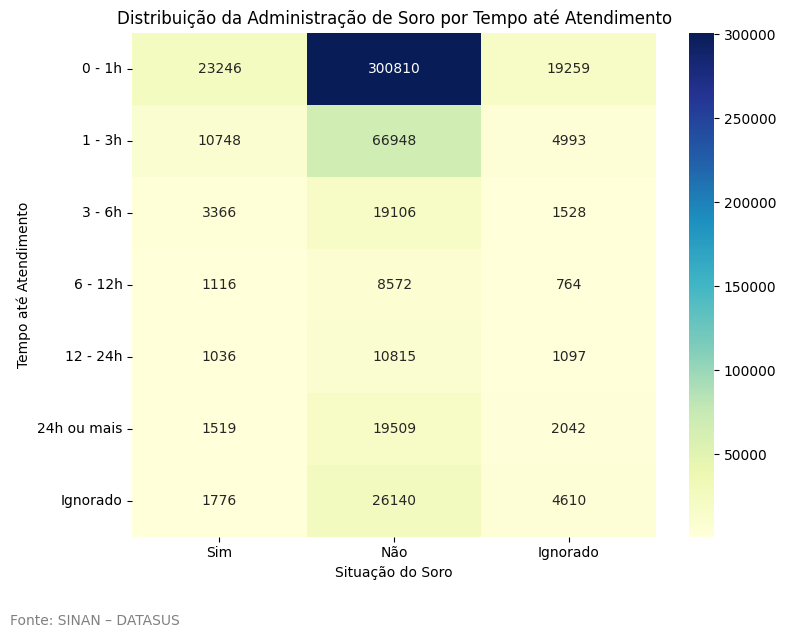

In [392]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo até Atendimento")
plt.xlabel("Situação do Soro")

# Adicionar legenda da fonte
plt.figtext(0.01, -0.05, "Fonte: SINAN – DATASUS", ha="left", fontsize=10, color="gray")

plt.tight_layout()
plt.show()

In [393]:
soro_tempo_N = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='index')
soro_tempo_N

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.067710,0.876192,0.056097
2.0,0.129981,0.809636,0.060383
3.0,0.140250,0.796083,0.063667
4.0,0.106774,0.820130,0.073096
5.0,0.080012,0.835264,0.084724
6.0,0.065843,0.845644,0.088513
9.0,0.054602,0.803665,0.141733


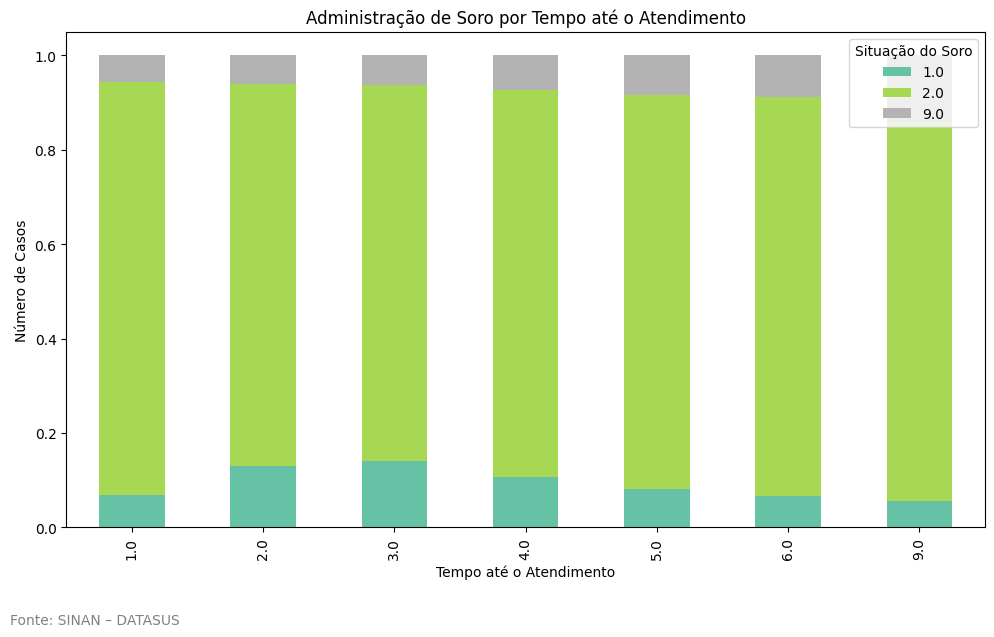

In [394]:
# Criar o gráfico
ax = soro_tempo_N.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2',
    title='Administração de Soro por Tempo até o Atendimento'
)

# Ajustar rótulos dos eixos
ax.set_xlabel("Tempo até o Atendimento")
ax.set_ylabel("Número de Casos")

# Adicionar legenda personalizada (caso queira ajustar posição)
plt.legend(title="Situação do Soro", loc='upper right')

# Adicionar a fonte
plt.figtext(0.01, -0.05, "Fonte: SINAN – DATASUS", ha="left", fontsize=10, color="gray")

# Ajustar layout para evitar corte
plt.tight_layout()
plt.show()

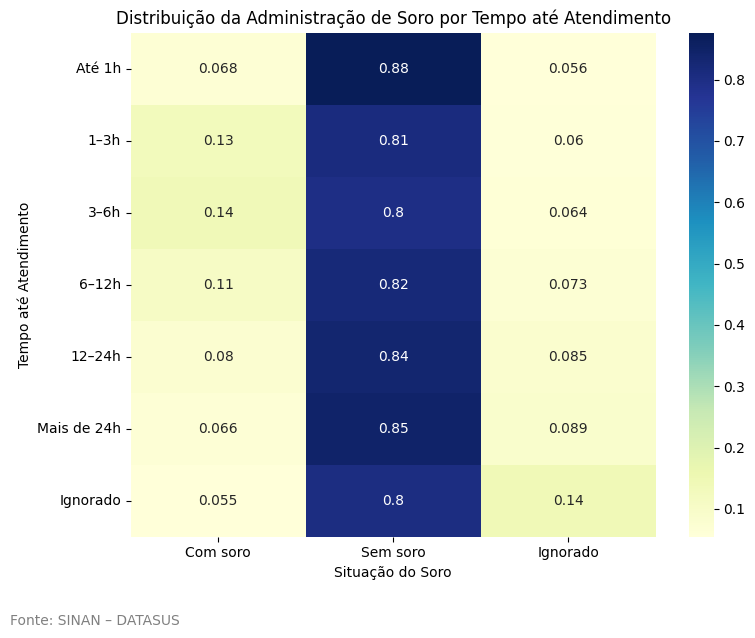

In [395]:
# Mapear rótulos mais legíveis
soro_labels = {1.0: 'Com soro', 2.0: 'Sem soro', 9.0: 'Ignorado'}
tempo_labels = {
    1.0: 'Até 1h',
    2.0: '1–3h',
    3.0: '3–6h',
    4.0: '6–12h',
    5.0: '12–24h',
    6.0: 'Mais de 24h',
    9.0: 'Ignorado'
}

# Aplicar os rótulos (ajuste conforme os índices reais)
heatmap_data = soro_tempo_N.rename(index=tempo_labels, columns=soro_labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

# Títulos e rótulos
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo até Atendimento")
plt.xlabel("Situação do Soro")

# Fonte
plt.figtext(0.01, -0.05, "Fonte: SINAN – DATASUS", ha="left", fontsize=10, color="gray")

# Layout
plt.tight_layout()
plt.show()

In [396]:
soro_tempo_N2 = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='columns')
soro_tempo_N2

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.543042,0.665656,0.561601
2.0,0.251080,0.148148,0.145598
3.0,0.078632,0.042279,0.044557
4.0,0.026071,0.018969,0.022279
5.0,0.024202,0.023932,0.031989
6.0,0.035485,0.043171,0.059546
9.0,0.041489,0.057845,0.134430


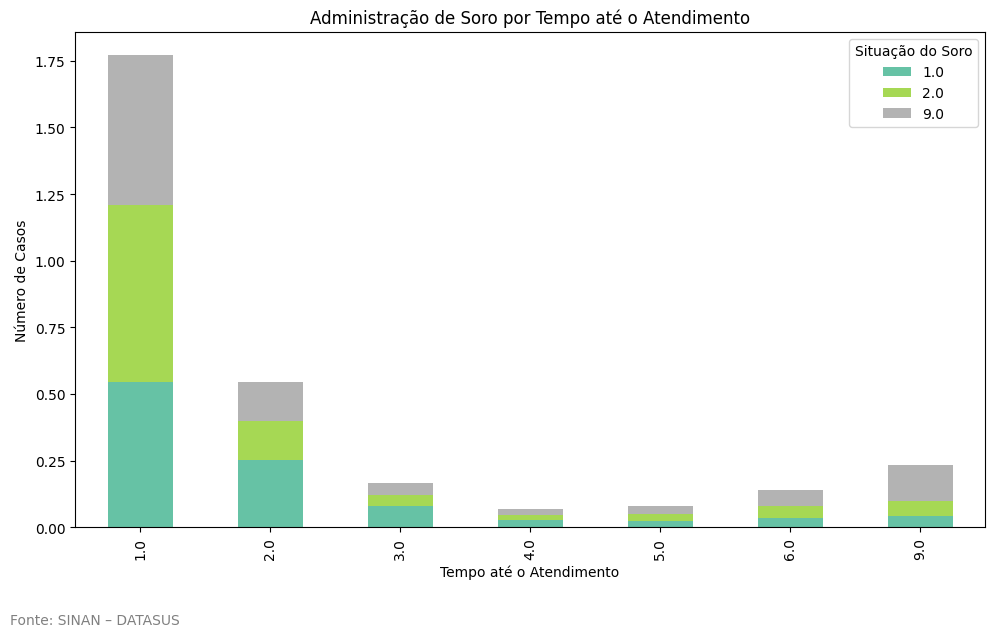

In [397]:
# Criar o gráfico de barras empilhadas
ax = soro_tempo_N2.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2',
    title='Administração de Soro por Tempo até o Atendimento'
)

# Eixos
ax.set_xlabel("Tempo até o Atendimento")
ax.set_ylabel("Número de Casos")

# Legenda
plt.legend(title="Situação do Soro", loc='upper right')

# Fonte abaixo do gráfico
plt.figtext(0.01, -0.05, "Fonte: SINAN – DATASUS", ha="left", fontsize=10, color="gray")

# Ajustar layout para não cortar a fonte
plt.tight_layout()
plt.show()

In [398]:
soro_rel_casos = (soro_tempo/len(df)) * 100
soro_rel_casos

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,4.319886,55.900586,3.578968
1 - 3h,1.997339,12.441184,0.927867
3 - 6h,0.625516,3.550536,0.283954
6 - 12h,0.207390,1.592965,0.141977
12 - 24h,0.192524,2.009790,0.203859
24h ou mais,0.282281,3.625426,0.379472
Ignorado,0.330040,4.857689,0.856693


In [399]:
# Transformar o DataFrame para formato longo (long-form)
soro_rel_long = soro_rel_casos.reset_index().melt(
    id_vars='ANT_TEMPO_',
    var_name='Soro',
    value_name='Percentual'
)

# Criar gráfico de barras horizontais empilhadas
fig = px.bar(
    soro_rel_long,
    y='ANT_TEMPO_',
    x='Percentual',
    color='Soro',
    orientation='h',
    text=soro_rel_long['Percentual'].round(2).astype(str) + '%',
    title='Distribuição Percentual dos Casos por Tempo até Atendimento e Administração de Soro',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Ajustes visuais
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Percentual (%)',
    yaxis_title='Tempo entre Picada e Atendimento',
    barmode='stack',
    legend_title='Recebeu Soro',
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.2,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=100)  # aumenta espaço inferior para não cortar a fonte
)

fig.show()

## Perfil dos pacientes


### Idade dos pacientes

In [400]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4048, 4046, 4018, 4039, 4028, 4014, 4015, 4006, 4012, 4041, 4054,
       4055, 4073, 4003, 4049, 4035, 4032, 4011, 4044, 4023, 4026, 4042,
       4031, 4025, 4029, 4037, 4010, 4076, 4066, 4016, 4065, 4069, 4051,
       4022, 4009, 4020, 4056, 4063, 2000, 4050, 4060, 4001, 4045, 4036,
       4002, 4034, 4058, 4061, 4075, 4059, 4038, 4064, 4017, 4040, 4030,
       4024, 4082, 4057, 4019, 4053, 4033, 4062, 4052, 4068, 4005, 4027,
       4043, 4013, 4021, 4047, 4008, 4004, 4007, 4072, 4067, 4074, 4098,
       4070, 4092, 4080, 3007, 3006, 3003, 4077, 4078, 4081, 4079, 3005,
       4086, 4084, 3011, 4071, 4087, 3010, 4097, 3009, 4085, 3008, 2008,
       4083, 2001, 2003, 3002, 2015, 3004, 2023, 3001, 2017,    8, 4090,
       2018, 4089, 4104, 4099, 2013, 2028, 4094,   51, 4088, 2030, 2027,
       2014, 4093, 2009,   38, 2002, 2005, 4000, 4091, 2006, 2020, 4095,
       2022, 2019, 2016, 2021, 2010,   28, 4096, 2007, 2012, 2011, 2004,
       2024, 2038, 4102, 1005, 2026, 1007, 3086, 30

In [401]:
# Converter para string e manter apenas os que têm 4 dígitos
df = df[df['NU_IDADE_N'].astype(str).str.match(r'^\d{4}$')]

In [402]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4048, 4046, 4018, 4039, 4028, 4014, 4015, 4006, 4012, 4041, 4054,
       4055, 4073, 4003, 4049, 4035, 4032, 4011, 4044, 4023, 4026, 4042,
       4031, 4025, 4029, 4037, 4010, 4076, 4066, 4016, 4065, 4069, 4051,
       4022, 4009, 4020, 4056, 4063, 2000, 4050, 4060, 4001, 4045, 4036,
       4002, 4034, 4058, 4061, 4075, 4059, 4038, 4064, 4017, 4040, 4030,
       4024, 4082, 4057, 4019, 4053, 4033, 4062, 4052, 4068, 4005, 4027,
       4043, 4013, 4021, 4047, 4008, 4004, 4007, 4072, 4067, 4074, 4098,
       4070, 4092, 4080, 3007, 3006, 3003, 4077, 4078, 4081, 4079, 3005,
       4086, 4084, 3011, 4071, 4087, 3010, 4097, 3009, 4085, 3008, 2008,
       4083, 2001, 2003, 3002, 2015, 3004, 2023, 3001, 2017, 4090, 2018,
       4089, 4104, 4099, 2013, 2028, 4094, 4088, 2030, 2027, 2014, 4093,
       2009, 2002, 2005, 4000, 4091, 2006, 2020, 4095, 2022, 2019, 2016,
       2021, 2010, 4096, 2007, 2012, 2011, 2004, 2024, 2038, 4102, 1005,
       2026, 1007, 3086, 3049, 2029, 2025, 3013, 41

In [403]:
def classificar_faixa(valor):
    try:
        valor = int(valor)
        unidade = int(str(valor)[0])
        numero = int(str(valor)[1:])

        # Converter tudo para idade em anos
        if unidade == 1:
            idade = numero / (24 * 365)
        elif unidade == 2:
            idade = numero / 365
        elif unidade == 3:
            idade = numero / 12
        elif unidade == 4:
            idade = numero
        else:
            return "Ignorado"

        # Classificação em faixas de 10 em 10 anos
        if idade < 10:
            return "0-9 anos"
        elif idade < 20:
            return "10-19 anos"
        elif idade < 30:
            return "20-29 anos"
        elif idade < 40:
            return "30-39 anos"
        elif idade < 50:
            return "40-49 anos"
        elif idade < 60:
            return "50-59 anos"
        elif idade < 70:
            return "60-69 anos"
        elif idade < 80:
            return "70-79 anos"
        elif idade < 90:
            return "80-89 anos"
        elif idade < 100:
            return "90-99 anos"
        else:
            return "100 anos ou mais"
    except:
        return "Ignorado"

In [404]:
df['faixa_etaria'] = df['NU_IDADE_N'].apply(classificar_faixa)

In [405]:
casos_idade = pd.crosstab(index=df['faixa_etaria'], columns='Frequência').reset_index()
casos_idade = df['faixa_etaria'].value_counts().reset_index()
casos_idade.columns = ['faixa_etaria', 'Frequência']
casos_idade

,faixa_etaria,Frequência
0,20-29 anos,90182
1,30-39 anos,81980
2,40-49 anos,78424
3,50-59 anos,74926
4,10-19 anos,67571
5,60-69 anos,54978
6,0-9 anos,54679
7,70-79 anos,26810
8,80-89 anos,7806
9,90-99 anos,725


In [406]:
# Gráfico de pizza
fig = px.pie(
    casos_idade,
    names='faixa_etaria',
    values='Frequência',
    title="Distribuição de Casos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar legenda da fonte
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)
)

fig.show()


In [407]:
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])
tabela_evolucao

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,50446,89,12,1857
10-19 anos,62745,19,8,2247
100 anos ou mais,30,0,0,1
20-29 anos,83798,12,4,2923
30-39 anos,75992,17,2,2813
40-49 anos,72656,27,7,2674
50-59 anos,69794,43,11,2414
60-69 anos,51361,53,8,1706
70-79 anos,25015,40,2,834


In [408]:
tab_evol = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'], normalize='index')
tab_evol

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,0.962636,0.001698,0.000229,0.035436
10-19 anos,0.965026,0.000292,0.000123,0.034559
100 anos ou mais,0.967742,0.000000,0.000000,0.032258
20-29 anos,0.966116,0.000138,0.000046,0.033700
30-39 anos,0.964072,0.000216,0.000025,0.035687
40-49 anos,0.964068,0.000358,0.000093,0.035481
50-59 anos,0.965847,0.000595,0.000152,0.033406
60-69 anos,0.966741,0.000998,0.000151,0.032111
70-79 anos,0.966166,0.001545,0.000077,0.032212


In [409]:
fig = px.bar(
    tabela_long,
    x='faixa_etaria',
    y='Frequência',
    color='Evolução',
    title='Distribuição dos Desfechos por Faixa Etária',
    labels={'faixa_etaria': 'Faixa Etária'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'faixa_etaria': ordem_idade}
)

# Empilhar barras lado a lado
fig.update_layout(
    barmode='group',
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.2,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=100)  # Aumenta a margem inferior para não cortar a anotação
)

# Exibir o gráfico
fig.show()

In [410]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')

# Filtrar apenas os óbitos (EVOLUCAO == 2)
df_obitos = df[df['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_idade = pd.crosstab(index=df_obitos['faixa_etaria'],
                            columns='Óbitos',
                            dropna=False)

tab_obt_idade.reset_index()

col_0,faixa_etaria,Óbitos
0,0-9 anos,89
1,10-19 anos,19
2,20-29 anos,12
3,30-39 anos,17
4,40-49 anos,27
5,50-59 anos,43
6,60-69 anos,53
7,70-79 anos,40
8,80-89 anos,19
9,90-99 anos,3


In [411]:
# Garantir que 'faixa_etaria' é uma coluna
if 'faixa_etaria' not in tab_obt_idade.columns:
    tab_obt_idade = tab_obt_idade.reset_index()

# Gráfico de pizza
fig = px.pie(
    tab_obt_idade,
    names='faixa_etaria',
    values='Óbitos',
    title="Distribuição Percentual de Óbitos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)
)

fig.show()


In [412]:
# Garantir que os índices estejam alinhados
tab_obt_idade = tab_obt_idade.copy()
casos_idade = casos_idade.copy()

tab_obt_idade = tab_obt_idade.set_index('faixa_etaria')
casos_idade = casos_idade.set_index('faixa_etaria')

# Calcular o percentual de óbitos por faixa etária
tab_obt_idade['Percentual'] = (
    tab_obt_idade['Óbitos'] * 100 / casos_idade['Frequência']
)

# Formatar o percentual com 3 casas decimais e adicionar símbolo %
tab_obt_idade['Label'] = tab_obt_idade['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar o índice para facilitar visualização e uso no gráfico
tab_obt_idade = tab_obt_idade.reset_index()

# Visualizar tabela final
tab_obt_idade

col_0,faixa_etaria,Óbitos,Percentual,Label
0,0-9 anos,89,0.162768,0.163%
1,10-19 anos,19,0.028119,0.028%
2,20-29 anos,12,0.013306,0.013%
3,30-39 anos,17,0.020737,0.021%
4,40-49 anos,27,0.034428,0.034%
5,50-59 anos,43,0.057390,0.057%
6,60-69 anos,53,0.096402,0.096%
7,70-79 anos,40,0.149198,0.149%
8,80-89 anos,19,0.243403,0.243%
9,90-99 anos,3,0.413793,0.414%


In [413]:
# Garantir ordem da faixa etária
tab_obt_idade['faixa_etaria'] = pd.Categorical(
    tab_obt_idade['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico de barras
fig = px.bar(
    tab_obt_idade.sort_values('faixa_etaria'),
    x='faixa_etaria',
    y='Percentual',
    text='Label',
    title='Letalidade por Faixa Etária (%)',
    labels={'faixa_etaria': 'Faixa Etária', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='Letalidade (%)',
    xaxis_title='Faixa Etária',
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS (acesso em 2024)",
            xref="paper", yref="paper",
            x=0, y=-0.2,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=100)
)

fig.show()


In [414]:
# Criar uma cópia do DataFrame original para não modificar df diretamente
casos_grupo = df.copy()

# Extrair a idade mínima da faixa etária (ex: '10 a 14' → 10)
casos_grupo['idade_min'] = casos_grupo['faixa_etaria'].str.extract(r'(\d+)').astype(float)

# Classificar em grupos etários personalizados
casos_grupo['grupo_etario'] = np.select(
    condlist=[
        casos_grupo['idade_min'] <= 19,
        casos_grupo['idade_min'] >= 60
    ],
    choicelist=[
        'Crianças e Adolescentes',
        'Idosos'
    ],
    default='Adultos'
)

obitos_grupo = casos_grupo.copy()
casos_grupo = pd.crosstab(index=casos_grupo['grupo_etario'], columns='Frequência').reset_index()
casos_grupo

col_0,grupo_etario,Frequência
0,Adultos,325512
1,Crianças e Adolescentes,122250
2,Idosos,90350


In [415]:
# Gráfico de pizza
fig = px.pie(
    casos_grupo,
    names='grupo_etario',
    values='Frequência',
    title="Frequência de Acidentes por Grupo Etário",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)  # Garante espaço inferior para exibir a fonte
)

fig.show()

In [416]:
# Filtrar apenas os óbitos (EVOLUCAO == 2)
obitos_grupo = obitos_grupo[obitos_grupo['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_grupo = pd.crosstab(index=obitos_grupo['grupo_etario'],
                            columns='Óbitos',
                            dropna=False).reset_index()

tab_obt_grupo

col_0,grupo_etario,Óbitos
0,Adultos,99
1,Crianças e Adolescentes,108
2,Idosos,115


In [417]:
# Garantir cópia dos DataFrames e alinhamento de índice
tab_obt_grupo = tab_obt_grupo.copy()
casos_grupo = casos_grupo.copy()

# Garantir que ambos estejam indexados por 'grupo_etario'
tab_obt_grupo = tab_obt_grupo.set_index('grupo_etario')
casos_grupo = casos_grupo.set_index('grupo_etario')

# Calcular o percentual de óbitos por grupo etário
tab_obt_grupo['Percentual'] = (
    tab_obt_grupo['Óbitos'] * 100 / casos_grupo['Frequência']
)

# Formatar percentual com 3 casas decimais e símbolo %
tab_obt_grupo['Label'] = tab_obt_grupo['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar índice para facilitar visualização e uso em gráficos
tab_obt_grupo = tab_obt_grupo.reset_index()

# Exibir a tabela final
tab_obt_grupo

col_0,grupo_etario,Óbitos,Percentual,Label
0,Adultos,99,0.030414,0.030%
1,Crianças e Adolescentes,108,0.088344,0.088%
2,Idosos,115,0.127283,0.127%


In [418]:
# Reforçar o tipo de dado como string
tab_obt_grupo['grupo_etario'] = tab_obt_grupo['grupo_etario'].astype(str)

# Definir ordem
ordem_grupo = ['Crianças e Adolescentes', 'Adultos', 'Idosos']
tab_obt_grupo['grupo_etario'] = pd.Categorical(
    tab_obt_grupo['grupo_etario'],
    categories=ordem_grupo,
    ordered=True
)

# Gráfico de barras
fig = px.bar(
    tab_obt_grupo.sort_values('grupo_etario'),
    x='grupo_etario',
    y='Percentual',
    text='Label',
    title='Letalidade por Grupo Etário (%)',
    labels={'grupo_etario': 'Grupo Etário', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Ajustes visuais
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='Letalidade (%)',
    xaxis_title='Grupo Etário',
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0.5, y=-0.2,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="center"
        )
    ],
    margin=dict(b=100)
)

fig.show()


### Raça/Cor

In [419]:
tab_raca = pd.crosstab(index=df['CS_RACA'], columns='Frequência').reset_index()
tab_raca

col_0,CS_RACA,Frequência
0,1.0,343507
1,2.0,29104
2,3.0,3844
3,4.0,110088
4,5.0,1145
5,9.0,41031


In [420]:
# Dicionário de mapeamento dos códigos
raca_dict = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

# Aplicar o mapeamento à coluna
tab_raca['Raça/Cor'] = tab_raca['CS_RACA'].map(raca_dict)


In [421]:
fig = px.pie(
    tab_raca,
    names='Raça/Cor',
    values='Frequência',
    title='Distribuição de Casos por Raça/Cor',
    color_discrete_sequence=px.colors.qualitative.Safe
)
# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)  # Garante espaço inferior para exibir a fonte
)
fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()

In [422]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
df_obt_raca = pd.crosstab(index=df_obt['CS_RACA'], columns='Frequência').reset_index()
df_obt_raca

col_0,CS_RACA,Frequência
0,1.0,209
1,2.0,21
2,3.0,7
3,4.0,66
4,9.0,15


In [423]:
df_obt_raca['Percentual'] = df_obt_raca['Frequência'] * 100 / tab_raca['Frequência']
df_obt_raca['Label'] = df_obt_raca['Percentual'].apply(lambda x: f'{x:.3f}%')
df_obt_raca['Raca'] = df_obt_raca['CS_RACA'].map(raca_dict)
df_obt_raca

col_0,CS_RACA,Frequência,Percentual,Label,Raca
0,1.0,209,0.060843,0.061%,Branca
1,2.0,21,0.072155,0.072%,Preta
2,3.0,7,0.182102,0.182%,Amarela
3,4.0,66,0.059952,0.060%,Parda
4,9.0,15,1.310044,1.310%,Ignorado


In [424]:
# Criar gráfico de barras
fig = px.bar(
    df_obt_raca,
    x='Raca',
    y='Percentual',
    title='Letalidade por Raça/Cor (%)',
    labels={'Percentual': 'Letalidade (%)', 'Raca': 'Raça/Cor'},
    color_discrete_sequence=px.colors.qualitative.Safe
)
# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)  # Garante espaço inferior para exibir a fonte
)

fig.show()

### Gênero

In [425]:
genero_abs = pd.crosstab(index=df['CS_SEXO'], columns='Frequência').reset_index()
genero_abs

col_0,CS_SEXO,Frequência
0,F,226106
1,I,247
2,M,311759


In [426]:
# Gráfico de pizza
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Frequência',
    title="Distribuição de Casos por Gênero",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)  # Garante espaço inferior para exibir a fonte
)

fig.show()

In [427]:
# População estimada do estado de SP por sexo (fonte: https://censo2022.ibge.gov.br/panorama/)
populacao_sp = {
    'M': 23014862,
    'F': 21396376
}

# Calcular taxa por 100 mil habitantes
genero_abs['Populacao_SP'] = genero_abs['CS_SEXO'].map(populacao_sp)
genero_abs['Taxa_por_100k'] = (genero_abs['Frequência'] / genero_abs['Populacao_SP']) * 100000

# Gráfico de pizza com taxas
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Taxa_por_100k',
    title="Taxa de Acidentes com Animais Peçonhentos por Gênero em SP (por 100 mil habitantes)",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fontes: SINAN – DATASUS e IBGE",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)  # Garante espaço inferior para exibir a fonte
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [428]:
genero_abs

col_0,CS_SEXO,Frequência,Populacao_SP,Taxa_por_100k
0,F,226106,21396376.0,1056.749049
1,I,247,NaN,NaN
2,M,311759,23014862.0,1354.598607


Portanto, os homens são mais vulneráveis aos acidentes com animais peçonhentos em SP, considerando a incidência proporcional à sua população.

### Grávidas

In [429]:
pd.crosstab(index=df['CS_GESTANT'], columns='Frequência').reset_index()

col_0,CS_GESTANT,Frequência
0,1.0,1214
1,2.0,1506
2,3.0,936
3,4.0,275
4,5.0,141375
5,6.0,364590
6,9.0,28196


In [430]:
df['Gesta_status'] = df['CS_GESTANT'].apply(
    lambda x: 'Não' if x in [5, 6, 9] else 'Sim'
)

In [431]:
tabela_ges = pd.crosstab(index=df['Gesta_status'], columns='Frequência').reset_index()
tabela_ges


col_0,Gesta_status,Frequência
0,Não,534161
1,Sim,3951


In [432]:
df_gest = df.copy()
df_gest = df_gest[df_gest['Gesta_status'] == 'Sim']
pd.crosstab(index=df_gest['EVOLUCAO'], columns='Frequência').reset_index()

col_0,EVOLUCAO,Frequência
0,1,3659
1,9,142


Não há registro de morte por animais peçonhentos em gestantes

### Escolaridade

In [433]:
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()
escol

col_0,CS_ESCOL_N,Frequência
0,0.0,5324
1,1.0,46395
2,2.0,27366
3,3.0,57148
4,4.0,33453
5,5.0,38779
6,6.0,91070
7,7.0,7303
8,8.0,16602
9,9.0,130381


In [434]:
# Agrupar 0.0, 9.0 e 10.0 como 9.0 (Ignorado)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace({0.0: 9.0, 10.0: 9.0})

# Gerar nova crosstab
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()

# Mapear os códigos para rótulos legíveis
escolaridade_dict = {
    1.0: '1ª a 4ª série incompleta',
    2.0: '4ª série completa',
    3.0: '5ª a 8ª série incompleta',
    4.0: 'Ensino fund. completo',
    5.0: 'Ensino médio incompleto',
    6.0: 'Ensino médio completo',
    7.0: 'Superior incompleto',
    8.0: 'Superior completo',
    9.0: 'Ignorado'
}

escol['Escolaridade'] = escol['CS_ESCOL_N'].map(escolaridade_dict)

escol

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,46395,1ª a 4ª série incompleta
1,2.0,27366,4ª série completa
2,3.0,57148,5ª a 8ª série incompleta
3,4.0,33453,Ensino fund. completo
4,5.0,38779,Ensino médio incompleto
5,6.0,91070,Ensino médio completo
6,7.0,7303,Superior incompleto
7,8.0,16602,Superior completo
8,9.0,173600,Ignorado


In [435]:
ordem_escolaridade = [
    '1ª a 4ª série incompleta',
    '4ª série completa',
    '5ª a 8ª série incompleta',
    'Ensino fund. completo',
    'Ensino médio incompleto',
    'Ensino médio completo',
    'Superior incompleto',
    'Superior completo',
    'Ignorado'
]


fig = px.pie(
    escol,
    names='Escolaridade',
    values='Frequência',
    title='Distribuição de Casos por Escolaridade',
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'Escolaridade': ordem_escolaridade}
)

# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.1,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="left"
        )
    ],
    margin=dict(b=80)  # Garante espaço inferior para exibir a fonte
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()



In [436]:
df_escol = df.copy()
df_escol = df_escol[df_escol['EVOLUCAO'] == 2]
escol_obt = pd.crosstab(index=df_escol['CS_ESCOL_N'], columns='Frequência').reset_index()
escol_obt['Escolaridade'] = escol_obt['CS_ESCOL_N'].map(escolaridade_dict)
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,35,1ª a 4ª série incompleta
1,2.0,18,4ª série completa
2,3.0,35,5ª a 8ª série incompleta
3,4.0,11,Ensino fund. completo
4,5.0,9,Ensino médio incompleto
5,6.0,20,Ensino médio completo
6,7.0,2,Superior incompleto
7,8.0,7,Superior completo
8,9.0,159,Ignorado


In [437]:
escol_obt['Percentual'] = escol_obt['Frequência'] * 100 / escol['Frequência']
escol_obt['Label'] = escol_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade,Percentual,Label
0,1.0,35,1ª a 4ª série incompleta,0.075439,0.075%
1,2.0,18,4ª série completa,0.065775,0.066%
2,3.0,35,5ª a 8ª série incompleta,0.061244,0.061%
3,4.0,11,Ensino fund. completo,0.032882,0.033%
4,5.0,9,Ensino médio incompleto,0.023208,0.023%
5,6.0,20,Ensino médio completo,0.021961,0.022%
6,7.0,2,Superior incompleto,0.027386,0.027%
7,8.0,7,Superior completo,0.042164,0.042%
8,9.0,159,Ignorado,0.091590,0.092%


In [438]:
fig = px.bar(
    escol_obt,
    x='Escolaridade',
    y='Percentual',
    title='Letalidade por Escolaridade (%)',
    labels={'Percentual': 'Percentual de letalidade', 'Escolaridade': 'Nível de Escolaridade'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0, y=-0.4,  # menos negativo = mais próximo do gráfico
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="center"
        )
    ],
    margin=dict(b=120)  # margem inferior aumentada
)

fig.show()


### Acidente de trabalho

In [439]:
# Dicionário de legenda para "Relacionado ao Trabalho"
trab_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

# Converter a coluna para tipo numérico (necessário para evitar erros de mapeamento)
df['DOENCA_TRA'] = pd.to_numeric(df['DOENCA_TRA'], errors='coerce')

# Substituir os valores na coluna pelo texto correspondente usando o dicionário
df['DOENCA_TRA'] = df['DOENCA_TRA'].map(trab_legend)

# Garantir que os valores existentes estejam mapeados corretamente
print("Valores únicos após mapeamento:")
print(df['DOENCA_TRA'].value_counts())

# Agrupando os dados por "Relacionado ao Trabalho" e contando os casos
filtered_data = df.groupby(["DOENCA_TRA"]).size().reset_index(name="Casos")

fig = px.bar(
    filtered_data,
    x="DOENCA_TRA",
    y="Casos",
    title="Casos relacionados ao trabalho",
    labels={"Casos": "Número de Casos", "DOENCA_TRA": "Relacionado ao Trabalho"},
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Adicionar a fonte abaixo do gráfico
fig.update_layout(
    annotations=[
        dict(
            text="Fonte: SINAN – DATASUS",
            xref="paper", yref="paper",
            x=0.5, y=-0.3,
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="center"
        )
    ],
    margin=dict(b=120)  # espaço inferior maior para acomodar a fonte
)

fig.show()

Valores únicos após mapeamento:
DOENCA_TRA
Não         432522
Sim          51411
Ignorado     36482
Name: count, dtype: int64
